In [1]:
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import matplotlib.pyplot as plt
import holidays

c:\Users\VR Belém - PDV\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("..\\data\\survey_results.csv")
df = df.sort_values(by=["ticket_id"]).drop_duplicates(subset=["ticket_id"], keep="last")

df = df[df["type"] != "2"]
df['createdDate'] = pd.to_datetime(df['createdDate']).dt.strftime('%Y-%m')
df


,ticket_id,createdDate,status,category,resolvedInFirstCall,urgency,chatWaitingTime,chatTalkTime,serviceFirstLevel,serviceSecondLevel,serviceThirdLevel,lifeTimeWorkingTime,organization,analyst,createdBy,type,value,comment
0,1000072,2022-01,Concluido,Duvida,False,Baixa - COM correcao,17.0,46.0,CADASTROS,ADMINISTRATIVO / CADASTRO / ESTOQUE / LOGISTICA,NaN,117.0,VRPA - ATACAREJO MAMONAS - L01 - (G17),Rayana Costa,Thalison Pimentel,S/A,S/N,NaN
1,1000323,2022-01,Concluido,Duvida,False,Alta - COM correcao,47.0,43.0,Consistencia,PDV,NaN,1752.0,SKYONE - VRPA - MERCEARIA NS DABADIA - L01,Ronald Lopes,Lais Choe,3,10,NaN
2,1000326,2022-01,Concluido,Duvida,False,Baixa - SEM correcao,66.0,16.0,Consultas Administrativas,Administrativo / Cadastro / Estoque / Logistica,NaN,193.0,VRPA - TUDO CONVENIENCIA - L01 - (ID364),Samara Moraes,Adriel,3,10,NaN
3,1000420,2022-01,Concluido,Duvida,False,Alta - COM correcao,83.0,9.0,FISCAL,FISCAL / CONTABIL / GERENCIADOR XML,NaN,1726.0,VRPA - SPAZZIO SUPERMERCADO,Ronald Lopes,Juliana,3,10,"um excelente profissional, um otimo atendiment..."
4,1000428,2022-01,Concluido,Duvida,False,Baixa - COM correcao,59.0,87.0,FISCAL,FISCAL / CONTABIL / GERENCIADOR XML,NaN,1722.0,VRPA - REI DO ALHO ATACADAO,Ronald Lopes,Setor Fiscal,S/A,S/N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29018,2132815,2025-02,Resolvido,Configuracao,True,Baixa - COM correcao,2.0,6.0,Puxar Atalho Aplicativos VR,ADM,NaN,6.0,VRPA - SUPERMERCADO IMPERIAL,Paulo Rodrigues,Rafael Lima Pedro,3,10,NaN
29020,2132852,2025-02,Resolvido,Configuracao,True,Baixa - SEM correcao,8.0,28.0,Contra Vale,VR Frente,Aplicativos VR,28.0,VRPA - SUPERMERCADO PINHEIRO,Luis Souza,Damon Souza,3,10,NaN
29021,2132873,2025-02,Resolvido,Duvida,True,Baixa - COM correcao,3.0,42.0,Produto,Operacional,VR Master - ADM,43.0,VRPA - ATACADAO MANO A MANO LJ01,Rodolfo Joaquim,Rennedy Eidi Soares Shibata,3,10,NaN
29022,2132890,2025-02,Resolvido,Configuracao,True,Baixa - SEM correcao,7.0,15.0,Cadastro - Operacional - Produto,VR Master,VRMAT ADM-FIN,15.0,VRPA - SUPERMERCADO MERCADAO CIDADE - MELGACO L01,Luis Souza,Adenise Araujo - Cadastro,3,10,NaN


In [3]:
df_ = df.groupby('createdDate').size().reset_index(name='y')
df_

,createdDate,y
0,2022-01,421
1,2022-02,671
2,2022-03,718
3,2022-04,573
4,2022-05,547
5,2022-06,464
6,2022-07,494
7,2022-08,567
8,2022-09,684
9,2022-10,659


In [4]:
df_ = df_.drop(index=36)


KeyError: '[36] not found in axis'

In [19]:
df_ = df_.rename(columns={'createdDate': "ds"})
df_.describe()

,y
count,36.000000
mean,756.138889
std,167.364129
min,421.000000
25%,659.750000
50%,741.500000
75%,861.750000
max,1142.000000


In [8]:
df_.query("y == 2")

,ds,y


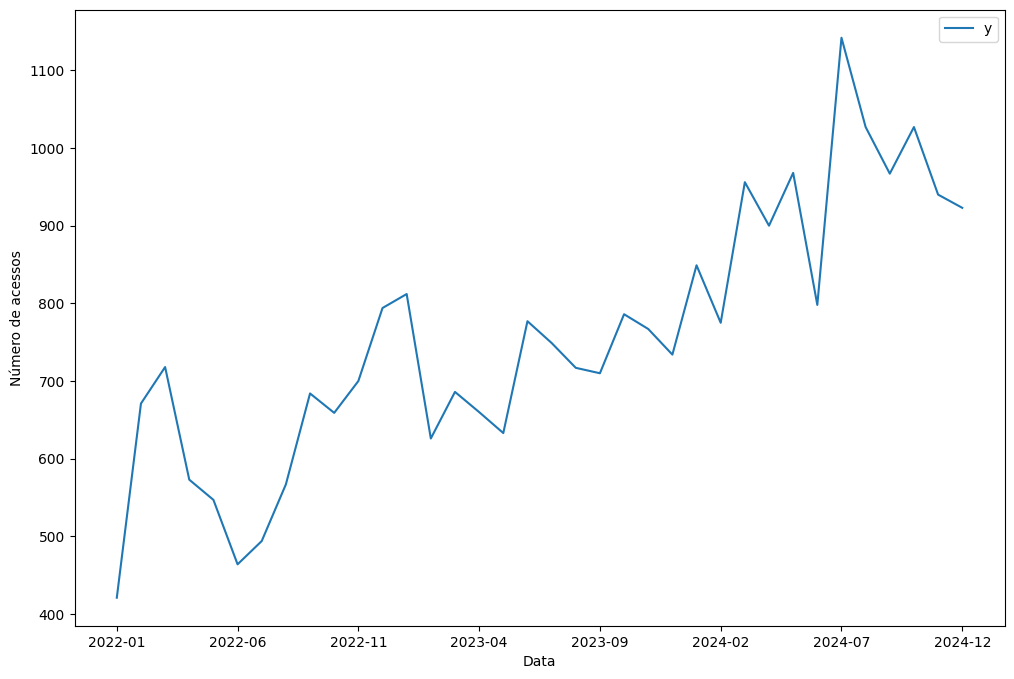

In [20]:
ax = df_.set_index('ds').plot(figsize=(12,8))
ax.set_ylabel('Número de acessos')
ax.set_xlabel('Data')


plt.show()

In [21]:
m = Prophet(changepoint_range = 1, changepoint_prior_scale=0.08)
m.fit(df_)

10:43:23 - cmdstanpy - INFO - Chain [1] start processing
10:43:23 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
future = m.make_future_dataframe(periods=3, freq='MS')
future.tail()


,ds
34,2024-11-01
35,2024-12-01
36,2025-01-01
37,2025-02-01
38,2025-03-01


In [23]:
forecast = m.predict(future)
forecast[['ds', 'yhat','yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2022-01-01,466.236003,381.400589,550.059643
1,2022-02-01,601.682380,522.393015,683.941097
2,2022-03-01,617.644327,538.068894,705.673736
3,2022-04-01,545.326160,458.480768,624.202895
4,2022-05-01,540.467059,457.323214,622.119588


In [24]:
# fig1 = m.plot(forecast)

In [25]:
# fig2 = m.plot_components(forecast)

In [26]:
plot_plotly(m, forecast)

In [16]:
plot_components_plotly(m, forecast)


[[<matplotlib.lines.Line2D at 0x1b1376ecbf0>]]

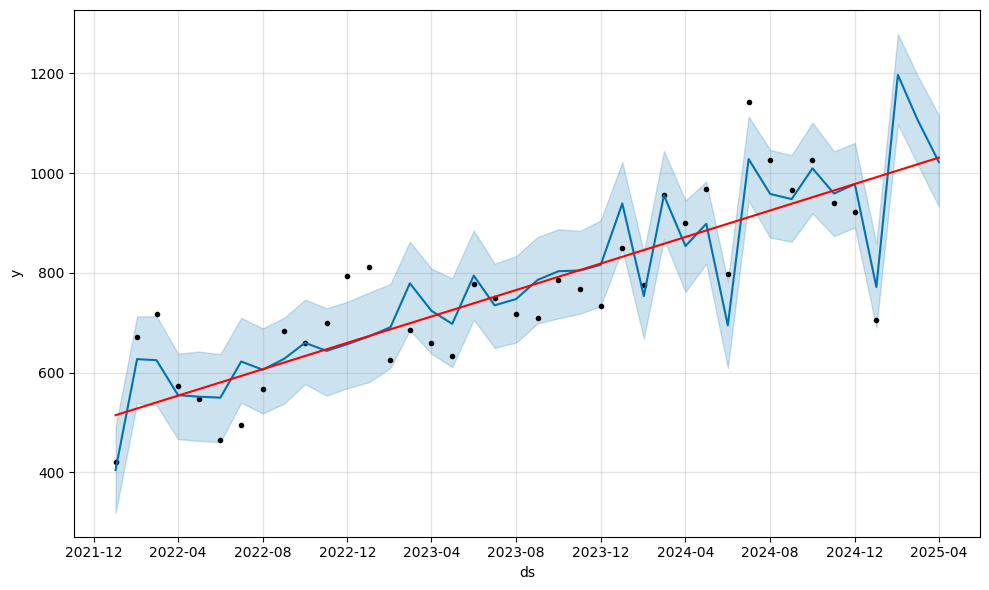

In [17]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
a